
SFFF
FHFH
FFFH
HFFG
Episode 14999/15000.

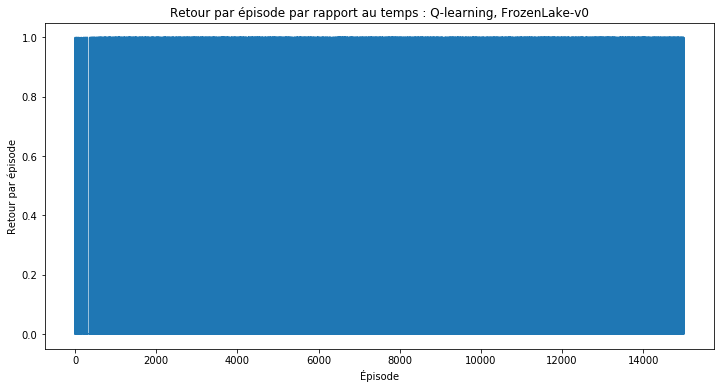

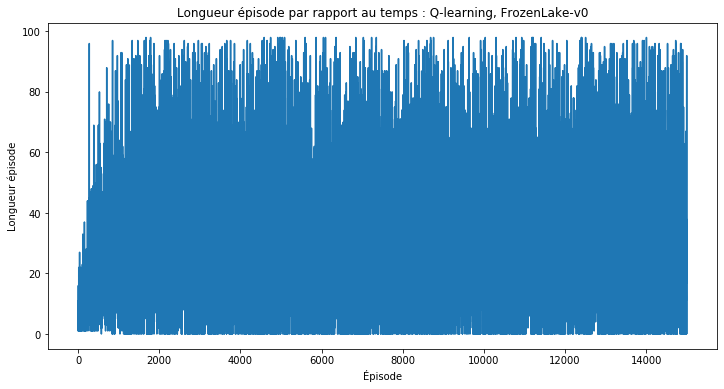

In [69]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Optimisation de politique avec méthode Q-learning
Politique epsilon-vorace
Environnement FrozenLake-v0 
Version avec décroissance de epsilon
"""
import gym
import numpy as np
import random
import itertools
import sys
import matplotlib
from matplotlib import pyplot as plt

def afficher_longueur_episode(longueur_episode):
    """
    Afficher l'évolution des longueurs d'épisodes avec le temps
    """
    figure1 = plt.figure(figsize=(12,6))
    plt.plot(longueur_episode)
    plt.xlabel("Épisode")
    plt.ylabel("Longueur épisode")
    plt.title("Longueur épisode par rapport au temps : Q-learning, FrozenLake-v0")
    
def afficher_retour_par_episode(retour_par_episode):
    """
    Afficher l'évolution des récompenses par épisode
    """
    figure1 = plt.figure(figsize=(12,6))
    plt.plot(retour_par_episode)
    plt.xlabel("Épisode")
    plt.ylabel("Retour par épisode")
    plt.title("Retour par épisode par rapport au temps : Q-learning, FrozenLake-v0")

def politique_optimale_Q(env, nombre_episodes, max_t=99, gamma=1.0, alpha= 1.0, epsilon=1, max_epsilon = 1.0, 
                min_epsilon = 0.01, taux_decroissance = 0.005):
    """
    Prédire la valeur de la politique par la méthode Q
        env: environnement de type OpenAI gym
        nombre_episodes: nombre d'épisodes générés pour les estimations
        gamma: facteur d'escompte des récompenses futures
    Retour:
        V: Dictionnaire(etat,valeur)
    """
    longueur_episode = np.zeros(nombre_episodes)
    retour_par_episode = np.zeros(nombre_episodes)
    nb_actions = env.action_space.n
    nb_etats = env.observation_space.n
    Q = np.zeros((nb_etats, nb_actions))
    
    for i_episode in range(nombre_episodes):
        if (i_episode+1) % 10 == 0:
            print("\rEpisode {}/{}.".format(i_episode, nombre_episodes), end="")
            sys.stdout.flush()

         # Un episode est un tableau de tuples (etat, action, recompense)
        etat = env.reset()
        for t in range(max_t):
            
            # Choisir action selon politique e-vorace
            unif_01 = random.uniform(0, 1)
            if unif_01 > epsilon:
                action = np.argmax(Q[etat,:])
            else:
                action = env.action_space.sample()
            
            etat_suivant, recompense, final, _ = env.step(action)
            Q[etat,action] = Q[etat,action]+alpha*(recompense+gamma*np.max(Q[etat_suivant,:])-Q[etat,action])
            retour_par_episode[i_episode]+=recompense
            if final:
                longueur_episode[i_episode] = t
                break
            etat = etat_suivant
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-taux_decroissance*i_episode) 
        
    return Q,retour_par_episode,longueur_episode

env = gym.make("FrozenLake-v0")
env.render()

Q,retour_par_episode,longueur_episode = politique_optimale_Q(env, nombre_episodes=15000,gamma=0.95, alpha=0.8)
afficher_retour_par_episode(retour_par_episode)
afficher_longueur_episode(longueur_episode)

In [70]:
""" Test du jeu après optimisation de Q """
nb_episodes = 3
max_etapes = 99 
env.reset()
recompenses = []

for episode in range(nb_episodes):
    etat = env.reset()
    final = False
    total_recompenses = 0
    print("**********************************")
    print("Épisode : ", episode)

    for etape in range(max_etapes):
        env.render()
        action = np.argmax(Q[etat])
        
        etat_suivant, recompense, final, _ = env.step(action)
        
        total_recompenses += recompense
        
        if final:
            recompenses.append(total_recompenses)
            print ("Total des récompenses de l'épisode :", total_recompenses)
            print("Longueur épisode :", etape)
            env.render()
            break
        etat = etat_suivant
env.close()
print ("Moyenne de récompenses par épisode: " +  str(sum(recompenses)/nb_episodes))

**********************************
Épisode :  0

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Total des récompenses de l'épisode : 1.0
Longueur épisode : 13
  (Down)
SFFF
FHFH
FFFH
HFFG
**********************************
Épisode :  1

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHF

In [71]:
Q

array([[1.58611679e-01, 4.14420378e-02, 4.05440505e-02, 3.66372640e-02],
       [1.64594252e-02, 7.13330751e-03, 1.05052830e-02, 2.61141009e-02],
       [3.51814723e-03, 1.28942878e-02, 4.16625175e-03, 1.71272339e-02],
       [5.85100618e-03, 6.28335960e-04, 8.91217174e-07, 1.55753529e-02],
       [3.81883683e-01, 3.05896023e-03, 1.47619370e-02, 2.79523532e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41063244e-06, 3.89125922e-06, 1.96831647e-02, 4.35567469e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.86614855e-02, 3.59183993e-02, 2.82971518e-02, 2.02992574e-01],
       [3.22588729e-02, 3.66362287e-02, 7.65808660e-03, 2.93845627e-02],
       [8.53083890e-03, 2.50006744e-03, 1.62500077e-02, 3.86939195e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.56570727e-02, 1.34918937e-01, 7.88651951e

In [72]:
print(longueur_episode)

[ 5. 10.  9. ... 21. 92. 17.]


In [73]:
retour_par_episode

array([0., 0., 0., ..., 1., 0., 0.])